In [1]:
#============================ IMPORT PACKAGES ===============================

import pandas as pd
import re
from sklearn.model_selection import train_test_split

#============================ 1. DATA SELECTION ===========================

print("-------------------------------------------")
print(" DATA SELECTION")
print("-------------------------------------------")
print()

data_frame=pd.read_excel("customer_retention_dataset.xlsx")
print(data_frame.head(20))
print()



#==================== 2.PREPROCESSING =======================================

#==== checking missing values ====

print("-------------------------------------------")
print("BEFORE HANDLING MISSING VALUES")
print("-------------------------------------------")
print()
print(data_frame.isnull().sum())

#==== Label Encoding ====

from sklearn import preprocessing

print("------------------------------------------------")
print(" BEFORE LABEL ENCODING ")
print("------------------------------------------------")
print()
print(data_frame['3 Which city do you shop online from?'].head(20))


label_encoder = preprocessing.LabelEncoder()

data_frame['3 Which city do you shop online from?'] = label_encoder.fit_transform(data_frame['3 Which city do you shop online from?'])

print("-------------------------------------------")
print(" AFTER LABEL ENCODING ")
print("------------------------------------------")
print()
print(data_frame['3 Which city do you shop online from?'].head(20))


#3 Which city do you shop online from?          

#========================= 4.DATA SPLITTING ============================

x=data_frame.drop(['47 Getting value for money spent'],axis=1)
y=data_frame['47 Getting value for money spent']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

print("-----------------------------------------------------------")
print("DATA SPLITTING")
print("-----------------------------------------------------------")
print()
print("Total No of input data    :",data_frame.shape[0])
print()
print("Total No of training data :",X_train.shape[0])
print()
print("Total No of testing data  :",X_test.shape[0])
print()


#47 Getting value for money spent

#========================= 5.CLASSIFICATION ============================

# === KNN ==

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#fitting the model
knn.fit(X_train, y_train)

#predict the model
nb_pred = knn.predict(X_train)

from sklearn.metrics import accuracy_score

acc_nb=accuracy_score(y_train, nb_pred)*100

print("----------------------------")
print(" K - NEAREST NEIGHBOUR ")
print("----------------------------")
print()
print("1. ACCURACY = ", acc_nb,'%')
print()
print("2. Classification Report")
print()
from sklearn import metrics
print(metrics.classification_report(y_train, nb_pred))


# === NAIVE BAYES ===

from sklearn.tree import DecisionTreeClassifier 

#initialize the model
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=100, min_samples_leaf=1)

#fitting the model
dt.fit(X_train, y_train)

#predict the model
dt_prediction=dt.predict(X_test)

acc_dt=accuracy_score(y_test, dt_prediction)*100

print("----------------------------")
print(" DECISION TREE ")
print("----------------------------")
print()
print("1. ACCURACY = ", acc_dt,'%')
print()
print("2. Classification Report")
print()
print(metrics.classification_report(y_test, dt_prediction))




C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


-------------------------------------------
 DATA SELECTION
-------------------------------------------

    1Gender of respondent  2 How old are you?   \
0                       0                    3   
1                       1                    2   
2                       1                    2   
3                       0                    2   
4                       1                    2   
5                       1                    3   
6                       0                    4   
7                       0                    4   
8                       1                    1   
9                       1                    3   
10                      0                    3   
11                      1                    4   
12                      1                    5   
13                      1                    3   
14                      1                    2   
15                      1                    2   
16                      0                    

----------------------------
 K - NEAREST NEIGHBOUR 
----------------------------

1. ACCURACY =  88.29787234042553 %

2. Classification Report

              precision    recall  f1-score   support

           3       0.90      0.93      0.91        28
           4       0.89      0.93      0.91       109
           5       0.85      0.76      0.80        51

   micro avg       0.88      0.88      0.88       188
   macro avg       0.88      0.87      0.88       188
weighted avg       0.88      0.88      0.88       188

----------------------------
 DECISION TREE 
----------------------------

1. ACCURACY =  100.0 %

2. Classification Report

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00

C:\ProgramData\Anaconda\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\ProgramData\Anaconda\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')



---------------------------------------------------



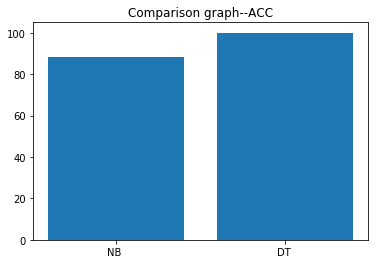

In [3]:
print()
print("---------------------------------------------------")
print()
import matplotlib.pyplot as plt
vals=[acc_nb,acc_dt]
inds=range(len(vals))
labels=["NB ","DT "]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('Comparison graph--ACC')
plt.show() 